Projetp

import pandas 

In [2]:
import numpy as np 
import pandas as pd 
import os
import lightgbm as lgb
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [3]:
df = pd.read_csv('/home/leandro/Documentos/archive/credit_card_transactions-ibm_v2.csv',nrows=1999999)
df.head()

,User,Card,Year,Month,Day,Time,Amount,Use Chip,Merchant Name,Merchant City,Merchant State,Zip,MCC,Errors?,Is Fraud?
0,0,0,2002,9,1,06:21,$134.09,Swipe Transaction,3527213246127876953,La Verne,CA,91750.0,5300,NaN,No
1,0,0,2002,9,1,06:42,$38.48,Swipe Transaction,-727612092139916043,Monterey Park,CA,91754.0,5411,NaN,No
2,0,0,2002,9,2,06:22,$120.34,Swipe Transaction,-727612092139916043,Monterey Park,CA,91754.0,5411,NaN,No
3,0,0,2002,9,2,17:45,$128.95,Swipe Transaction,3414527459579106770,Monterey Park,CA,91754.0,5651,NaN,No
4,0,0,2002,9,3,06:23,$104.71,Swipe Transaction,5817218446178736267,La Verne,CA,91750.0,5912,NaN,No


In [4]:
# Substitui valores Nan por 0 na coluna Zip
df['Zip'] = df['Zip'].fillna(0)

# Retira o caracter $ dos valores da coluna Amount
df['Amount'] = df['Amount'].apply(lambda value: float(value.split("$")[1]))

# Cria coluna hora e minuto derivado da coluna Time
df['Hour'] = df['Time'].apply(lambda value: int(value.split(":")[0]))
df['Minutes'] = df['Time'].apply(lambda value: int(value.split(":")[1]))

# deleta a coluna Time
df.drop(['Time'], axis=1, inplace=True)

# Converte as colunas no tipo objeto
df['Merchant Name'] = df['Merchant Name'].astype("object")
df['Card'] = df['Card'].astype("object")
df['Use Chip'] = df['Use Chip'].astype("object")
df['MCC'] = df['MCC'].astype("object")
df['Zip'] = df['Zip'].astype("object")

In [5]:
# Separa variável alvo (y) das preditoras (X)
y = df['Is Fraud?']
X = df.drop(['Is Fraud?'],axis=1)

In [6]:
df['Merchant State'].nunique()

138

In [7]:
categorical_column_names = []
categorical_cols = []
for idx,col in enumerate(X.columns):
    col_type = X[col].dtype
    if col_type == 'object' or col_type.name == 'category':
        categorical_column_names.append(col)
        categorical_cols.append(idx)

In [8]:
categorical_column_names.append("Zip")
categorical_column_names.append("MCC")
categorical_column_names.append("Card")
categorical_column_names.append("Merchant Name")


In [9]:
categorical_names = {}
for feature in categorical_column_names:
    le = sklearn.preprocessing.LabelEncoder()
    le.fit(X.loc[:, feature])
    X.loc[:, feature] = le.transform(X.loc[:, feature])
    categorical_names[feature] = le.classes_

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0, stratify=y)

In [11]:
model = lgb.LGBMClassifier()
model.fit(X_train, y_train, feature_name='auto', categorical_feature = categorical_column_names, verbose=50)

/home/leandro/Documentos/GitHub/Credit_Card_Transactions/venv_credit_card_transaction/lib/python3.8/site-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
/home/leandro/Documentos/GitHub/Credit_Card_Transactions/venv_credit_card_transaction/lib/python3.8/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')


LGBMClassifier()

In [12]:
y_pred=model.predict(X_test)

In [13]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          No       1.00      1.00      1.00    599333
         Yes       0.43      0.64      0.52       667

    accuracy                           1.00    600000
   macro avg       0.72      0.82      0.76    600000
weighted avg       1.00      1.00      1.00    600000



<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

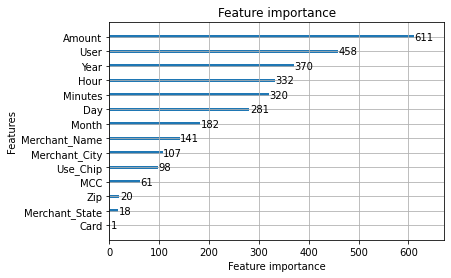

In [14]:
from lightgbm import plot_importance
plot_importance(model)


In [15]:
#Import the library
import lime.lime_tabular

ModuleNotFoundError: No module named 'lime'

In [ ]:
predict_fn = lambda x: model.predict_proba(x)